<a href="https://colab.research.google.com/github/raunaksatone5/cardiovascular-risk-prediction/blob/main/cardiovascularprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

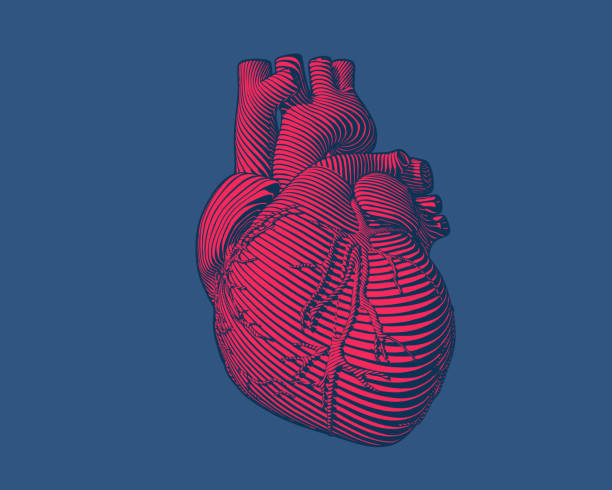

#Poject Title : Cardiovascular Risk Prediction

### Problem Description
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

### Data Description
### Demographic:
* ### Sex: male or female("M" or "F")
* ### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* ### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ### Diabetes: whether or not the patient had diabetes (Nominal) Medical (current)
* ### Tot Chol: total cholesterol level (Continuous)
* ### Sys BP: systolic blood pressure (Continuous)
* ### Dia BP: diastolic blood pressure (Continuous)
* ### BMI: Body Mass Index (Continuous)
* ### Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ### Glucose: glucose level (Continuous) Predict variable (desired target)
* ### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV



In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the dataset
df = pd.read_csv('/content/data_cardiovascular_risk.csv')


In [ ]:
# first look at our data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# shape of dataset
df.shape

(3390, 17)

In [ ]:
# columns of our data
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# returns the number of unique values for each variable.
df.nunique(axis=0)

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# checking for NaN and datatype of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Let us check for duplicates
duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


No Duplicates Found

#Data Cleaning

HANDLING NaN VALUES

In [ ]:
# Let us drop the ID column as it is unique and not of much use for this analysis.
df.drop('id',axis=1,inplace=True)

In [ ]:
# Let us check the new shape
df.shape

(3390, 16)

In [ ]:
# let us check the data for any null values
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# taking care of null values with the help of imputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [ ]:
class Data_preprocessing:
  def __init__(self,train_data):
        self.train_data = train_data

  def missing_value_continous(self,columns_with_specific_type,neighbors=3):
    knn_imputer= KNNImputer(n_neighbors=neighbors)

    knn_imputer.fit(self.train_data[columns_with_specific_type])
    self.train_data[columns_with_specific_type]= knn_imputer.transform(self.train_data[columns_with_specific_type])
    return self.train_data

  def missing_value_categorical(self,columns_with_specific_type,imputation_type="most_frequent"):
   most_frequent= SimpleImputer(strategy="most_frequent")
   most_frequent.fit(self.train_data[columns_with_specific_type])
   self.train_data[columns_with_specific_type]= most_frequent.transform(self.train_data[columns_with_specific_type])
   return self.train_data

In [ ]:
dlist= [df]
for ddf in dlist:
  #create class object
  dat= Data_preprocessing(ddf)
  ddf= dat.missing_value_continous(continuos_columns)
  ddf= dat.missing_value_categorical(categorical_columns)

NaN values have now been filled

lets check!

In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Identify the categorical and numerical columns to check the data distribution
column_datatypes= df.drop("TenYearCHD",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continuos_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

### Outlier Treatment

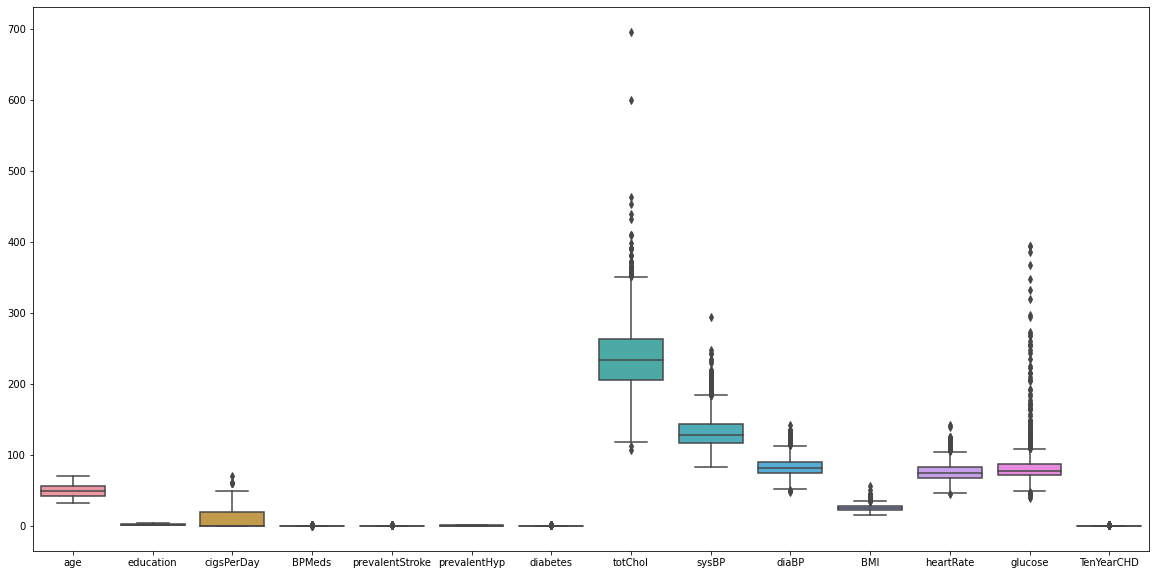

In [ ]:
# ploting data to detect outliers if any
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

Outliers are important here and we simply cannot remove them because there could be a possibility that a person might have a high risk and removing it, would lead to ignorance of the same. This would further affect the machine learning model.

In [ ]:
print(df.totChol.min())
print(df.totChol.max())
print(df.totChol.mean())

107.0
696.0
237.07305801376597


We can clearly see higher value (i.e. 600) in the Totalchol in the box plot. This is now being replaced with average value for the ease of analysis purpose.

Lets see if theirs a good proportion between our positive & negative binary predictor.

In [ ]:
# We replaced 600 with 500 because we are focusing on people having risk of heart disease in future.
df['totChol'] = df['totChol'].replace(600.0,500.0)
df['totChol'] = df['totChol'].replace(696,500.0)

In [ ]:
# Let us check
df.loc[420:425,:]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
420,40.0,2.0,F,YES,20.000000,0.0,0.0,0.0,0.0,165.0,101.0,59.0,23.06,60.0,76.0,0
421,50.0,1.0,F,NO,0.000000,0.0,0.0,0.0,0.0,281.0,107.5,74.0,23.44,85.0,79.0,0
422,55.0,1.0,F,YES,9.666667,0.0,0.0,1.0,0.0,213.0,163.0,91.0,28.66,69.0,66.0,0
423,52.0,2.0,F,NO,0.000000,0.0,0.0,1.0,1.0,500.0,159.5,94.0,28.27,78.0,140.0,1
424,48.0,2.0,F,NO,0.000000,0.0,0.0,0.0,0.0,237.0,124.5,66.5,33.29,80.0,91.0,0
425,43.0,4.0,M,YES,20.000000,0.0,0.0,0.0,0.0,187.0,129.5,88.0,25.62,80.0,75.0,0


Finally the data cleaning part is done with handling NaN values and outlier treatment.

#Feature Engineering

One Hot Encoding

Let us know focus on converting the categorical columns into numbers which can be read by the algorithms.

We have two features i.e.

sex - Male(M)/Female(F) which needs to be converted to 1 / 0

is_smoking - YES/NO which needs to be converted to 1 / 0

In [ ]:
# applying One Hot Encoding to the variables- SEX and IS_SMOKING:
# binary encoding
df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,30.913333,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0


Co-relation of features

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Let us divide the given columns into continous and discrete
continous_columns_list = ['age','cigsPerDay', 'totChol','sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

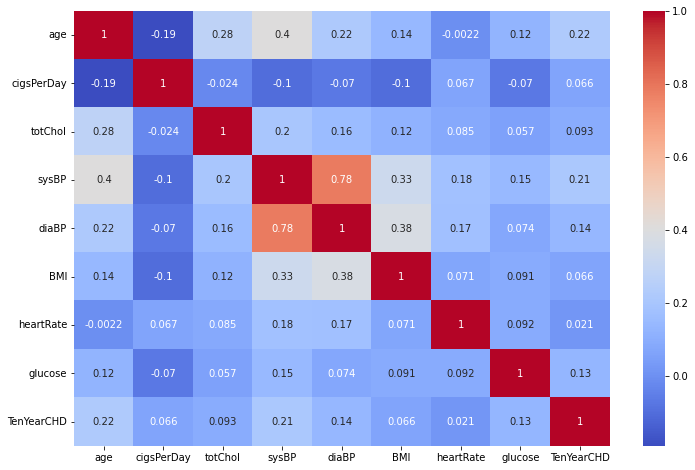

In [ ]:
# correlation matrix between numerical variables and RISK of getting heart disease
cont_col = continous_columns_list.copy() 
cont_col.append('TenYearCHD')
plt.figure(figsize=(12,8))
sns.heatmap(df[cont_col].corr(),annot=True, cmap='coolwarm')                

sysBP & diaBP are co-related to each other. The co-relation is 0.78.

sysBP & TenYearCHD has a co-relation of 0.21.

diaBP & TenYearCHD has a co-relation of 0.14.

For a healthy human, the BP is 120/80.

Let us derive a new feature i.e. avgBP which would be defined by the below formula

avgBP = (sysBP + diaBP)/2

In [ ]:
# creating new feature avgBP
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [ ]:
# Let us check the co-relation of avgBP and TenYearCHD
df["avgBP"].corr(df["TenYearCHD"])

0.1957935000660334

In [ ]:
# Since avgBP has been added, we can now remove sysBP & diaBP
df.drop("sysBP",axis=1,inplace=True)
df.drop("diaBP",axis=1,inplace=True)

In [ ]:
cont_col = ['age',
 'cigsPerDay',
 'totChol',
 'avgBP',
 'BMI',
 'heartRate',
 'glucose']

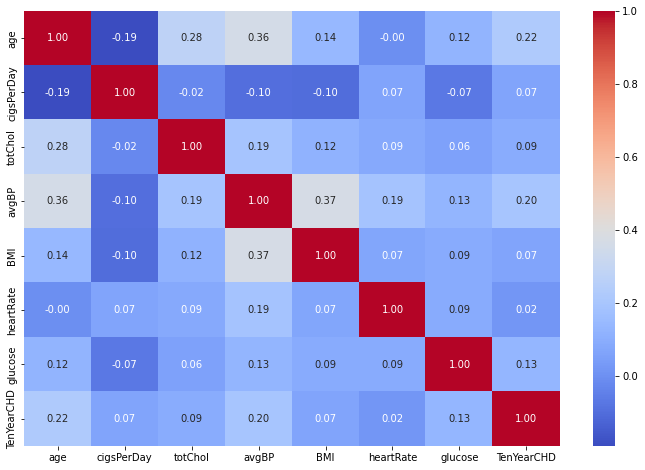

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.extend(['TenYearCHD'])
plt.figure(figsize=(12,8))
g = sns.heatmap(df[cont_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,30.913333,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,29.770000,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,20.350000,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,28.260000,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,26.420000,70.0,77.0,0,110.75


#EDA - Feature Analysis

In [ ]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

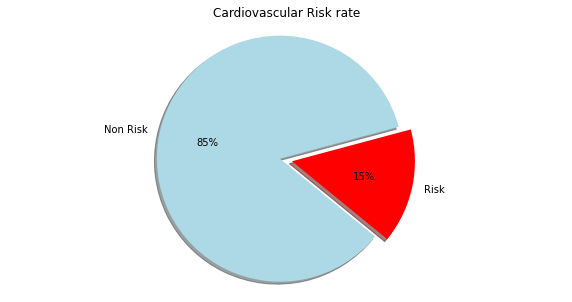

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels, autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

85% people - No Risk - Majority Class

15% people - Risk - Minority Class 

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'avgBP'],
      dtype='object')

In [ ]:
# creating lists of continuos and discrete features
continous_columns_list = ['age','cigsPerDay', 'totChol','avgBP','BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','BPMeds','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']


EDA - Feature Analysis on Continuous Features

<Figure size 720x432 with 0 Axes>

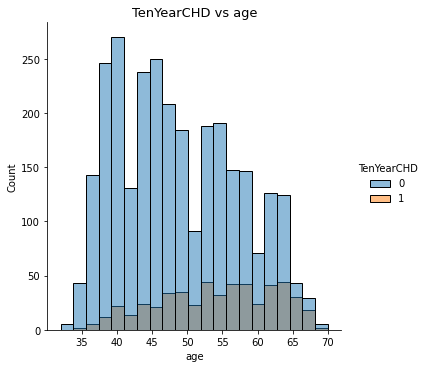

<Figure size 720x432 with 0 Axes>

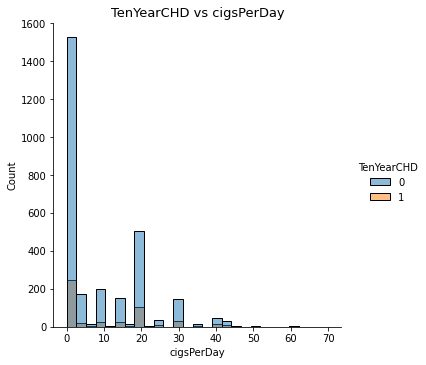

<Figure size 720x432 with 0 Axes>

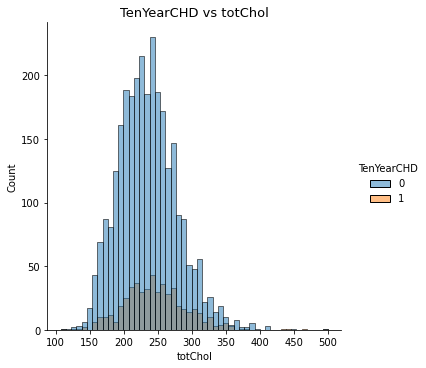

<Figure size 720x432 with 0 Axes>

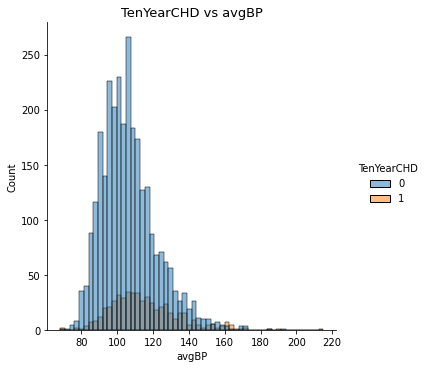

<Figure size 720x432 with 0 Axes>

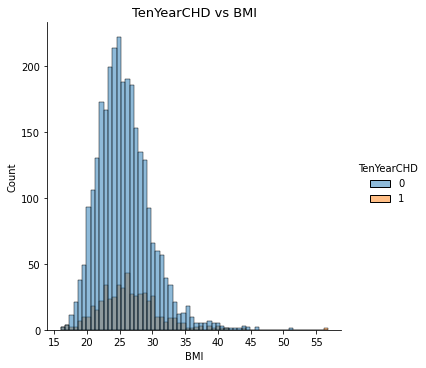

<Figure size 720x432 with 0 Axes>

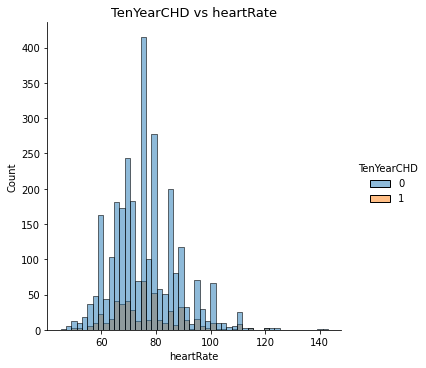

<Figure size 720x432 with 0 Axes>

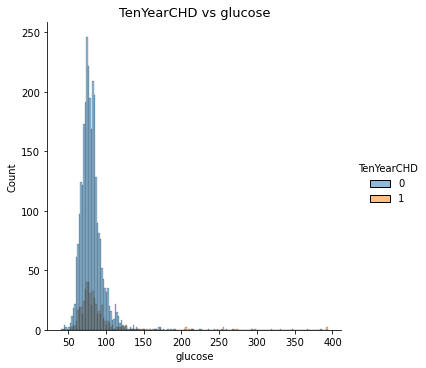

In [ ]:
for i, ii in enumerate(continous_columns_list):
  plt.figure(figsize = (10,6))
  #sns.distplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

Inference:

1. Glucose slightly shows a bit of right skewness. But since we are concerned about people with cardiovascular issues we consider the right skewed values as an important information so we left it as it is.

2. cigsPerDay is not following Gaussian/Normal distribution and from the dist plot as well as the kde plot we did not get any inference w.r.t target variable.

**EDA - Feature Analysis on Discrete Features**

<Figure size 720x432 with 0 Axes>

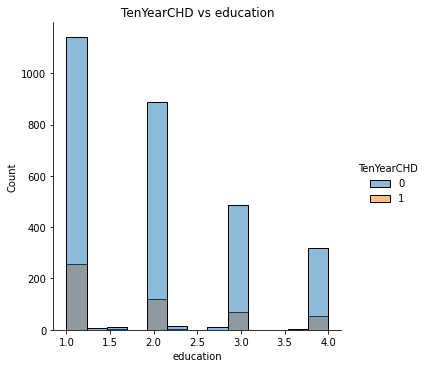

<Figure size 720x432 with 0 Axes>

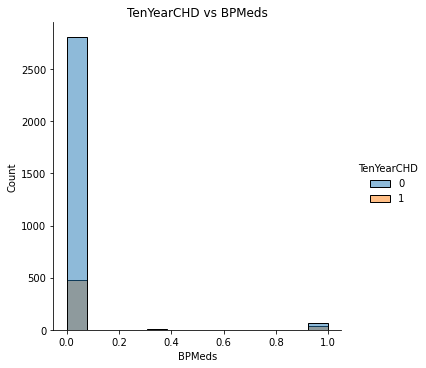

<Figure size 720x432 with 0 Axes>

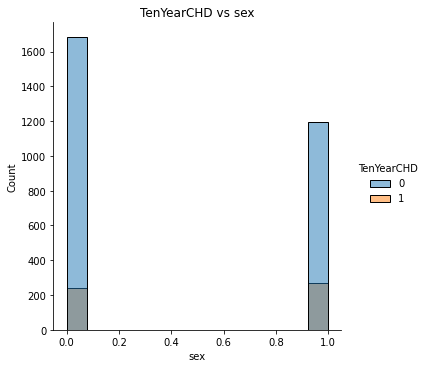

<Figure size 720x432 with 0 Axes>

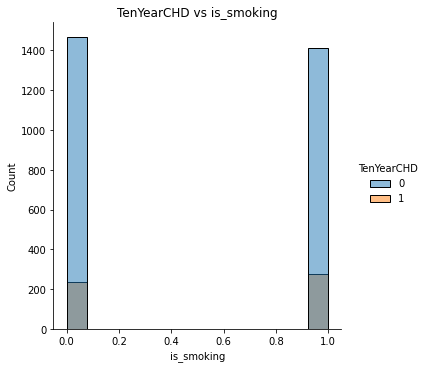

<Figure size 720x432 with 0 Axes>

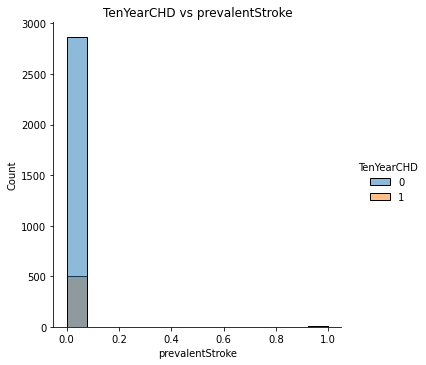

<Figure size 720x432 with 0 Axes>

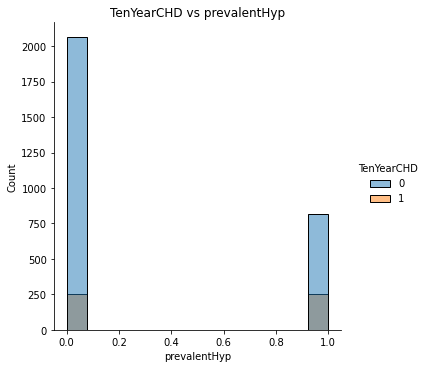

<Figure size 720x432 with 0 Axes>

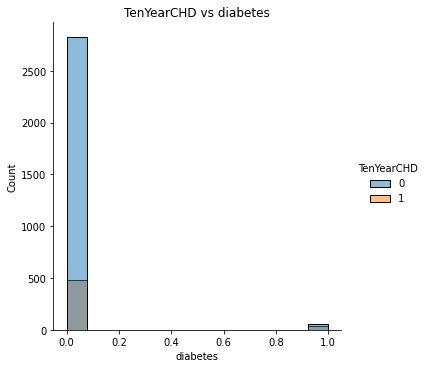

In [ ]:
# Dependent variable vs categorical features
for i, ii in enumerate(discrete_columns_list):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

Inference:

1. Education is important, as it is evident that if people are aware, they take care and precautions in order to avoid the risk of CHD.

2. BPMeds, Prevalentstroke, diabetes have very low variance, thus we are unable to come up with any generalized conclusion about the co-relation between their history and prevalence of cardiovascular risk.

**Heat-Map**

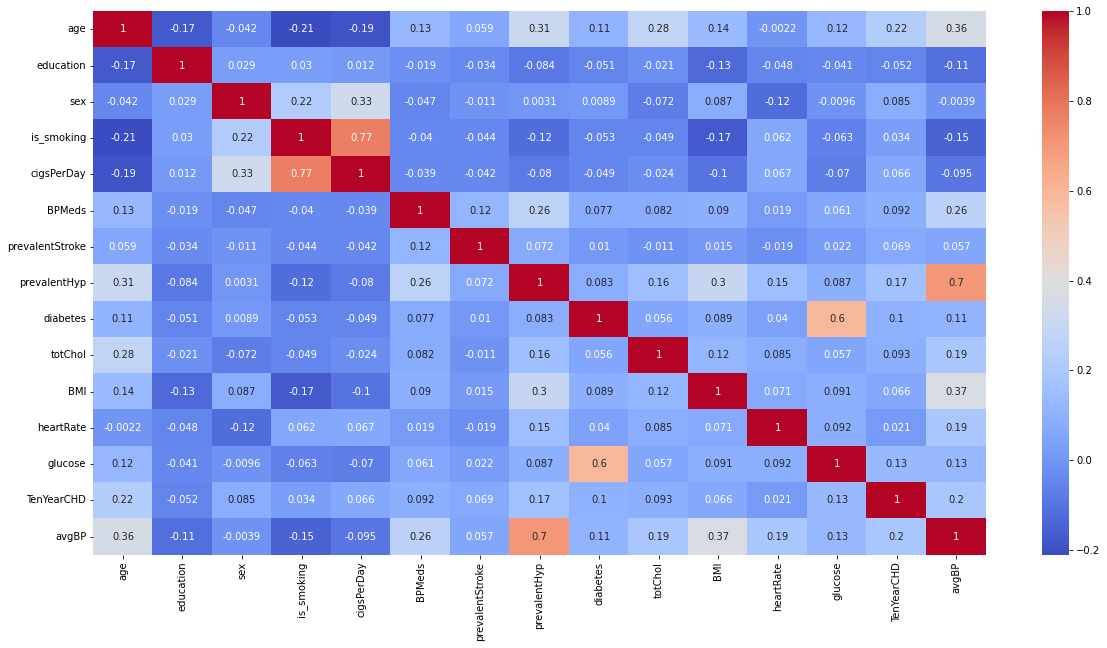

In [ ]:
# Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Inference:

It is evident from the above graph that the features having low variance i.e., BPMeds, Prevalentstroke, diabetes do not have any direct or good linear relationship with the target variable(TenYearCHD).

**EDA on Features

Age & Sex v/s Risk**

In [ ]:
# unique values for feature sex
df['sex'].unique()

array([0, 1])

Text(0.5, 1.0, 'Male')

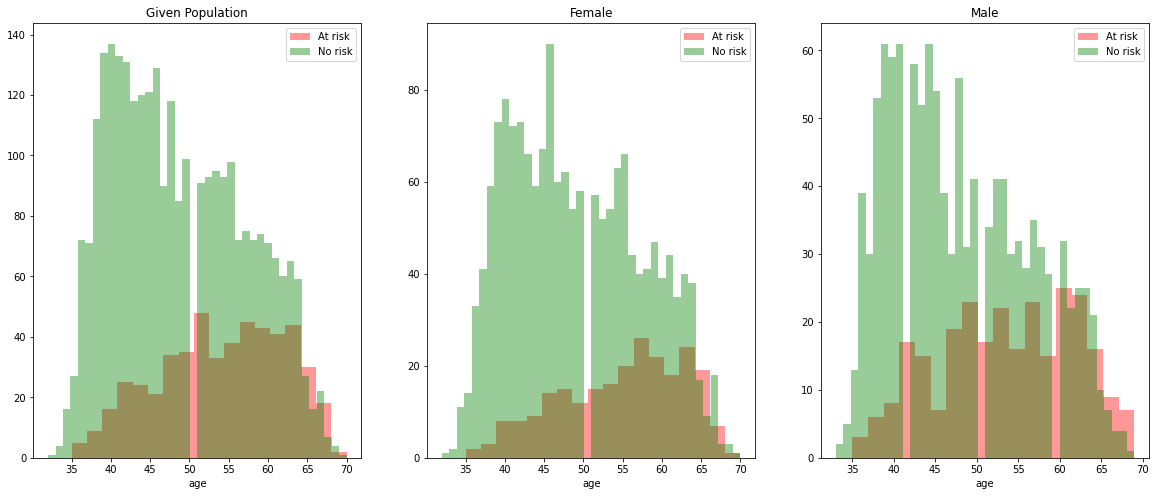

In [ ]:
# Ditribution plots
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='g',kde=False)
ax.legend()
ax.set_title("Male")

Inference:

We can infer the below from the above graphs:

1. Both women and men lying in Age group of 50 and above have high risk of heart disease.

2. Men above 45 years are usually at risk, where as women above 55 years are usually at risk.

3. Men are more likely to have heart disease compared to women.

**Age & Smoking v/s Risk**

Text(0.5, 1.0, 'NonSmokers')

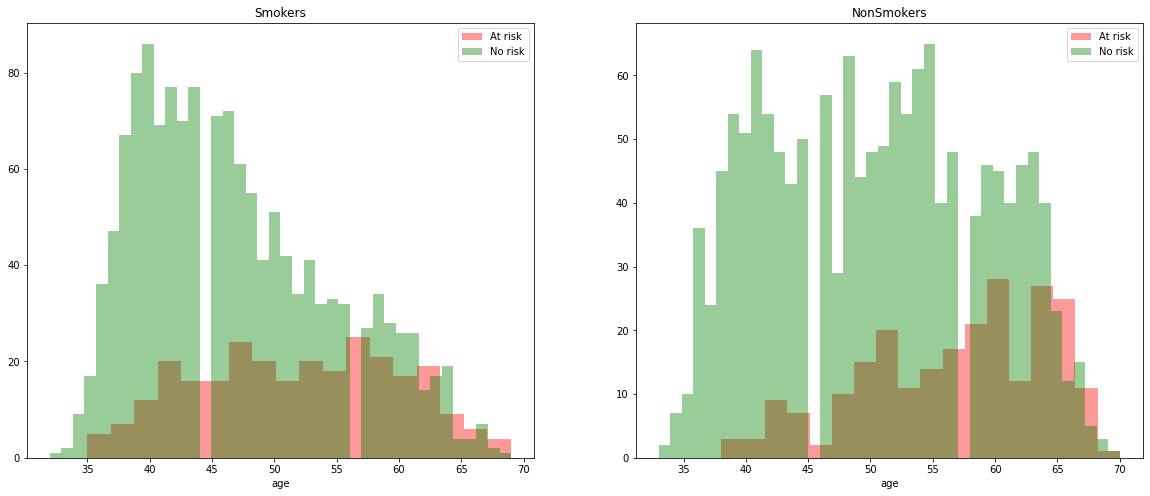

In [ ]:
# distribution plots on age and smoking
at_risk = "At risk"
no_risk= "No risk"
smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

Inference:

Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.

**CigsPerDay & Sex v/s Risk**

In [ ]:
df['is_smoking'].unique()

array([1, 0])

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)

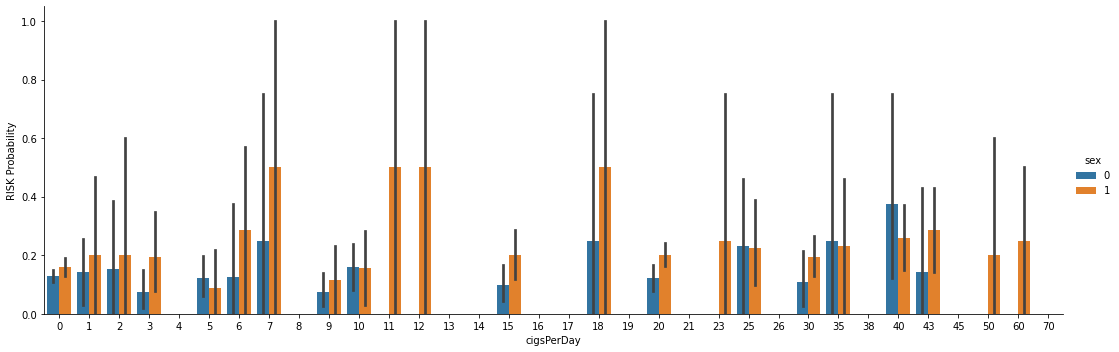

In [ ]:
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3)
g=g.set_ylabels("RISK Probability")

Inference:

1. It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.

2. Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.

**Diabetes & Age v/s Risk**

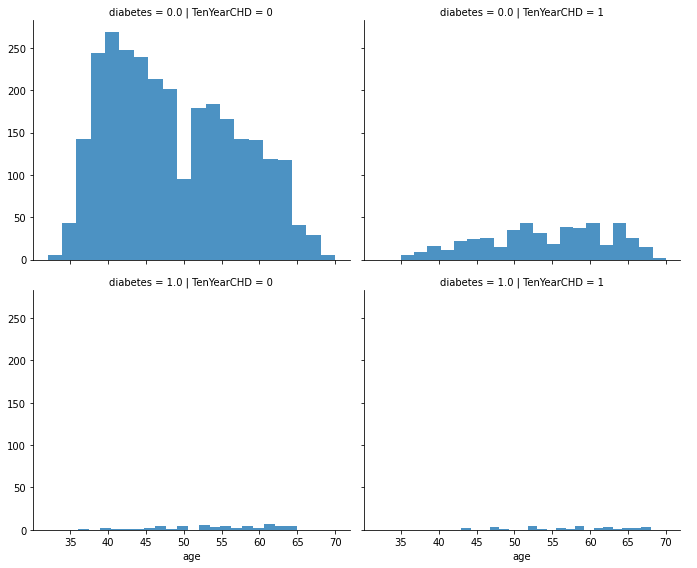

In [ ]:
# visualizing diabetes and age vs risk 
grid= sns.FacetGrid(df,col='TenYearCHD',row='diabetes',size=4,aspect=1.2,palette='viridis')
grid.map(plt.hist,'age',alpha=.8,bins=20)
grid.add_legend();

Inference:

1. Non-Diabetic - Lesser risk of CHD.

2. Diabetic - Higher risk of CHD.

#Data Splitting, Training & Modelling

**Data Splitting**

In [ ]:
# Let us make a copy
new_df = df.copy()

In [ ]:
new_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3,0.0,0.0,0.0,0.0,221.0,30.913333,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0,0.0,0.0,1.0,0.0,212.0,29.770000,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10,0.0,0.0,0.0,0.0,250.0,20.350000,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20,0.0,0.0,1.0,0.0,233.0,28.260000,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30,0.0,0.0,0.0,0.0,241.0,26.420000,70.0,77.0,0,110.75


In [ ]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

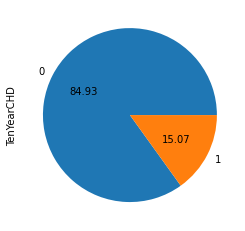

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

As per the above plot our target feature i.e., TenYearCHD, the risk rate is relatively rare, only 15% of the people have this disease.

Hence even if our model gives 94% accuracy! It is misleading.

All those non-risk cases, we’d have 100% accuracy. Those cases in which a person has a risk, we’d have 0% accuracy.

Hence our Evaluation Metrics for class imbalance problems (especiallly health data) would be RECALL, ROC SCORE.

**Handling Imbalance Data**

In [ ]:
# Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
from collections import defaultdict

In [ ]:
y_resampled.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

DATA is now balanced.

**Standardization**

In [ ]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [ ]:
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))

#Data Modelling & Training
We shall study the following training models#

1. Logistic Regression

2. K Nearest Neighbour

3. Decision Tree

4. Support Vector Machine

In [ ]:
# Importing all the essesntial Libraries.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.25,stratify = y_resampled, random_state=0)


In [ ]:
# creating list of matrix to store the evaluation matrix of all model
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

In [ ]:
# creating list of matrix to store the evaluation matrix of all the tuned model
accuracy_score_list1 = []
precision_score_list1 = []
recall_score_list1 = []
f1_score_list1 = []

In [ ]:
# defining the fuction to trian and evaluate the models
def run_model(model,X_train,y_train,X_test,y_test):
    # fit model
    model.fit(X_train,y_train)
    
    # get metrics
    preds = model.predict(X_test)

    import math
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('\n================Evalution Matrix=========================\n')

    acc_score = accuracy_score(preds,y_test)
    print('accuracy_score:',acc_score)
    precision= precision_score(preds,y_test)
    print('precision_score:',precision)
    recall= recall_score(preds,y_test)
    print('recall_score:',recall)
    f1_score= f1_score(preds, y_test)
    print('f1_score:',f1_score)
    print('\n=========================================================\n')
    
    
    accuracy_score_list.append(acc_score)
    precision_score_list.append(precision)
    recall_score_list.append(recall)
    f1_score_list.append(f1_score)


    # ploting curve
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n')
    plt.figure(figsize=(15,8))
    svc_disp = plot_roc_curve(model,X_test,y_test)
    x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
    plt.plot(x,y,'b--',color='r')
    plt.show()



In [ ]:
# defining the fuction to trian and evaluate the tuned models

def run_tuned_model(model,X_train,y_train,X_test,y_test):


    import math
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    #  fit model
    model.fit(X_train,y_train)

    #  get metrics
    preds = model.predict(X_test)
    
    print('\n================Evalution Matrix=========================\n')

    acc_score = accuracy_score(preds,y_test)
    print('accuracy_score:',acc_score)
    precision= precision_score(preds,y_test)
    print('precision_score:',precision)
    recall= recall_score(preds,y_test)
    print('recall_score:',recall)
    f1_score= f1_score(preds, y_test)
    print('f1_score:',f1_score)
    print('\n========================================================-\n')

    
    accuracy_score_list1.append(acc_score)
    precision_score_list1.append(precision)
    recall_score_list1.append(recall)
    f1_score_list1.append(f1_score)
    

    # ploting curve
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n')
    plt.figure(figsize=(15,8))
    svc_disp = plot_roc_curve(model,X_test,y_test)
    x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
    plt.plot(x,y,'b--',color='r')
    plt.show()


Logistic Regression


================Evalution Matrix=========================

accuracy_score: 0.6722222222222223
precision_score: 0.6736111111111112
recall_score: 0.6717451523545707
f1_score: 0.6726768377253814


    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

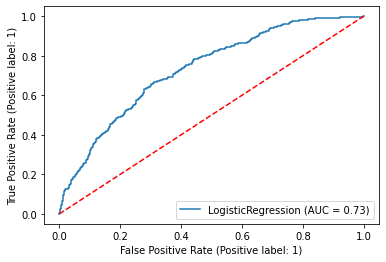

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# calling run_model to train,fit and evaluate the lr model
run_model(lr,X_train,y_train,X_test,y_test)

Hyper-Parameter tuning for Logistic Regression

In [ ]:
#Hyperparameter Tuning for Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2'] # By default its l1
c_values = [100, 10, 1.0, 0.1, 0.01] 
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # 5*3*15 = 225
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)

Fitting 30 folds for each of 15 candidates, totalling 450 fits

================Evalution Matrix=========================

accuracy_score: 0.6777777777777778
precision_score: 0.675
recall_score: 0.6787709497206704
f1_score: 0.6768802228412257

========================================================-

    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

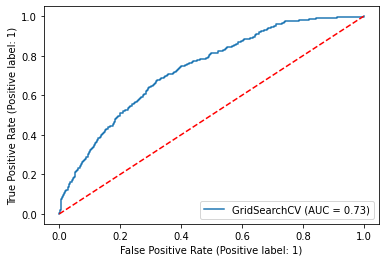

In [ ]:
# calling run_tuned_model to train,fit and evaluate the grid_search_lr
run_tuned_model(grid_search_lr,X_train,y_train,X_test,y_test)

In [ ]:
# summarize results - logistic regression
print("Best: %f using %s" % (grid_search_lr.best_score_, grid_search_lr.best_params_))

Best: 0.666971 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Inference:

There was not much difference before and after hyper-parameter tuning.

NOTE: We used both 5 and 10 splits and it was repeated 3 times. The result was still the same, especially recall and F1 score are were the same.

**K-Nearest Neighbor**


================Evalution Matrix=========================

accuracy_score: 0.7784722222222222
precision_score: 0.8763888888888889
recall_score: 0.7328687572590011
f1_score: 0.7982289690069576


    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

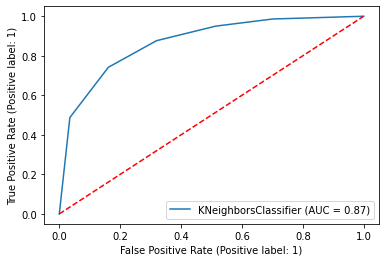

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
# calling run_model to train,fit and evaluate the knn model
run_model(knn,X_train,y_train,X_test,y_test)

Hyper-Parameter tuning for K-Nearest Neighbor

In [ ]:
# hyper-parameter tuning for knn model
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)

Fitting 10 folds for each of 30 candidates, totalling 300 fits

================Evalution Matrix=========================

accuracy_score: 0.8347222222222223
precision_score: 0.9222222222222223
recall_score: 0.7848699763593381
f1_score: 0.8480204342273308

========================================================-

    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

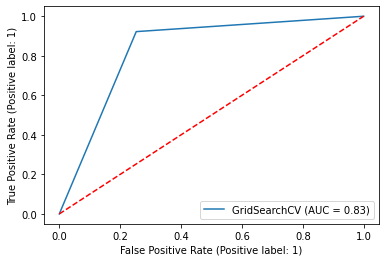

In [ ]:
# calling run_tuned_model to train,fit and evaluate the grid_search_knn
run_tuned_model(grid_search_knn,X_train,y_train,X_test,y_test)

In [ ]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


Inference:

Before Hyperparameter Tuning:

AUC score = 91%

Recall : 78%

F1 Score : 84%

After Hyperparameter Tuning:

AUC score = 89%

Recall : 84%

F1 Score : 89%

Hence though AUC got reduced, recall and F1score has increased.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


================Evalution Matrix=========================

accuracy_score: 0.8333333333333334
precision_score: 0.8402777777777778
recall_score: 0.8287671232876712
f1_score: 0.8344827586206898


    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

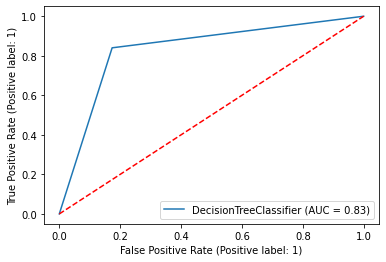

In [ ]:
# calling run_model to train,fit and evaluate the dTree
dTree= DecisionTreeClassifier()
run_model(dTree,X_train,y_train,X_test,y_test)

**Hyper-Parameter tuning for Decision Tree**

In [ ]:
# Creating a dictionary of all the parameter options 
parameters = {'criterion': ['gini', 'entropy'],
                  'max_depth': range(1,10),
              #    'min_samples_split': range(1,10),
              # 'min_samples_leaf': range(1,5),
              # 'random_state': '42'
              'max_features': range(1,11)}

# Creating a grid search object
grid_search_dTree = GridSearchCV(estimator=dTree, param_grid=parameters, n_jobs=-1, cv=10, verbose=3)

# Fitting the grid search
# grid_search_dTree.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits

================Evalution Matrix=========================

accuracy_score: 0.7854166666666667
precision_score: 0.8013888888888889
recall_score: 0.7765814266487214
f1_score: 0.7887901572112098

========================================================-

    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

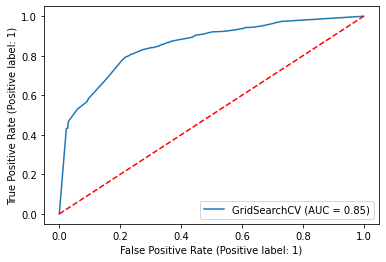

In [ ]:
# calling run_tuned_model to train,fit and evaluate the grid_search_dTree model
run_tuned_model(grid_search_dTree,X_train,y_train,X_test,y_test)

In [ ]:
# Viewing The Best Parameters
print('Best Parameters:', grid_search_dTree.best_estimator_.get_params())

Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 8, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Inference:

We can see an increase in the Recall, F1 Score, AUC_score after hyperparameter tuning

**Support Vector Machine**


================Evalution Matrix=========================

accuracy_score: 0.7326388888888888
precision_score: 0.7569444444444444
recall_score: 0.7218543046357616
f1_score: 0.7389830508474576


    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

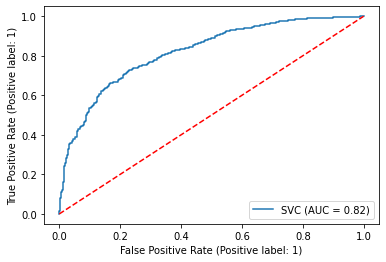

In [ ]:
from sklearn.svm import SVC
svm= SVC()
# calling run_model to train,fit and evaluate the svm
run_model(svm,X_train,y_train,X_test,y_test)

Hyper-Parameter Tuning for Support Vector Machine

In [ ]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, 
                               scoring='f1',error_score=0,verbose=3)

Fitting 30 folds for each of 10 candidates, totalling 300 fits

================Evalution Matrix=========================

accuracy_score: 0.8215277777777777
precision_score: 0.8416666666666667
recall_score: 0.8090787716955942
f1_score: 0.8250510551395508

========================================================-

    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

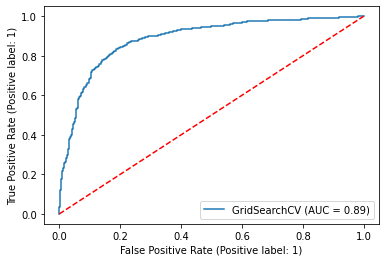

In [ ]:
# calling run_tuned_model to train,fit and evaluate the grid_search_svm
run_tuned_model(grid_search_svm,X_train,y_train,X_test,y_test)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search_svm.best_score_, grid_search_svm.best_params_))

Best: 0.807467 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


Inference:

*We can see a good increase in the performance of Recall, F1_Score, AUC_Score.* 

**Random Forest Classifier**


================Evalution Matrix=========================

accuracy_score: 0.90625
precision_score: 0.8777777777777778
recall_score: 0.930780559646539
f1_score: 0.9035025017869907


    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

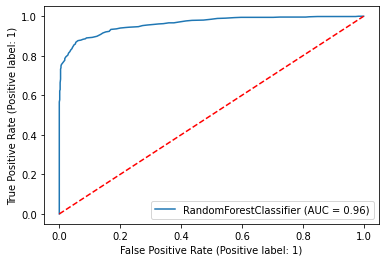

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# calling run_model to train,fit and evaluate the rf model
run_model(rf,X_train,y_train,X_test,y_test)

In [ ]:
param_grid = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

# Creating a grid search object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)


Fitting 3 folds for each of 288 candidates, totalling 864 fits

================Evalution Matrix=========================

accuracy_score: 0.88125
precision_score: 0.8430555555555556
recall_score: 0.912781954887218
f1_score: 0.8765342960288809

========================================================-

    =========================================================    Evalution Graph    ===================================================



<Figure size 1080x576 with 0 Axes>

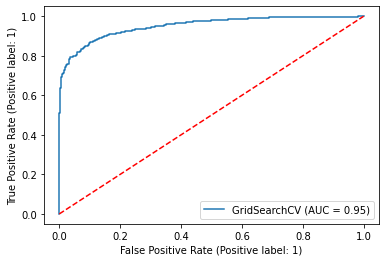

In [ ]:
# calling run_tuned_model to train,fit and evaluate the grid_search_rf
run_tuned_model(grid_search_rf,X_train,y_train,X_test,y_test)

*the f1_score has decreased after hyper parameter tuning so we will use the original model*

#Comparing the performance of all the models


In [ ]:
# list of all model made
model_name=['Linear','K-Nearest_Neighbor','Decision_Tree','Support_vector_machine','Random_forest_classifier']


In [ ]:
original_model_matrices={'accuracy_score':accuracy_score_list,'precision_score':precision_score_list,'recall_score':recall_score_list,'f1_score':f1_score_list}
original_model_matrices

{'accuracy_score': [0.6722222222222223,
  0.7784722222222222,
  0.8333333333333334,
  0.7326388888888888,
  0.90625],
 'f1_score': [0.6726768377253814,
  0.7982289690069576,
  0.8344827586206898,
  0.7389830508474576,
  0.9035025017869907],
 'precision_score': [0.6736111111111112,
  0.8763888888888889,
  0.8402777777777778,
  0.7569444444444444,
  0.8777777777777778],
 'recall_score': [0.6717451523545707,
  0.7328687572590011,
  0.8287671232876712,
  0.7218543046357616,
  0.930780559646539]}

In [ ]:
# converting dictionary to dataframe for easy visual
original_matrices_df=pd.DataFrame.from_dict(original_model_matrices,orient="index",columns=model_name)
original_matrices_df

,Linear,K-Nearest_Neighbor,Decision_Tree,Support_vector_machine,Random_forest_classifier
accuracy_score,0.672222,0.778472,0.833333,0.732639,0.906250
precision_score,0.673611,0.876389,0.840278,0.756944,0.877778
recall_score,0.671745,0.732869,0.828767,0.721854,0.930781
f1_score,0.672677,0.798229,0.834483,0.738983,0.903503


In [ ]:
tuned_model_matrices={'accuracy_score':accuracy_score_list1,'precision_score':precision_score_list1,'recall_score':recall_score_list1,'f1_score':f1_score_list1}
tuned_model_matrices

{'accuracy_score': [0.6777777777777778,
  0.8347222222222223,
  0.7854166666666667,
  0.8215277777777777,
  0.88125],
 'f1_score': [0.6768802228412257,
  0.8480204342273308,
  0.7887901572112098,
  0.8250510551395508,
  0.8765342960288809],
 'precision_score': [0.675,
  0.9222222222222223,
  0.8013888888888889,
  0.8416666666666667,
  0.8430555555555556],
 'recall_score': [0.6787709497206704,
  0.7848699763593381,
  0.7765814266487214,
  0.8090787716955942,
  0.912781954887218]}

In [ ]:
# converting dictionary to dataframe for easy visual
tuned_matrices_df=pd.DataFrame.from_dict(tuned_model_matrices,orient="index",columns=model_name)
tuned_matrices_df

,Linear,K-Nearest_Neighbor,Decision_Tree,Support_vector_machine,Random_forest_classifier
accuracy_score,0.677778,0.834722,0.785417,0.821528,0.881250
precision_score,0.675000,0.922222,0.801389,0.841667,0.843056
recall_score,0.678771,0.784870,0.776581,0.809079,0.912782
f1_score,0.676880,0.848020,0.788790,0.825051,0.876534


In [ ]:
# transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices = tuned_matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

,Models,accuracy_score,precision_score,recall_score,f1_score
0,Linear,0.677778,0.675000,0.678771,0.676880
1,K-Nearest_Neighbor,0.834722,0.922222,0.784870,0.848020
2,Decision_Tree,0.785417,0.801389,0.776581,0.788790
3,Support_vector_machine,0.821528,0.841667,0.809079,0.825051
4,Random_forest_classifier,0.881250,0.843056,0.912782,0.876534


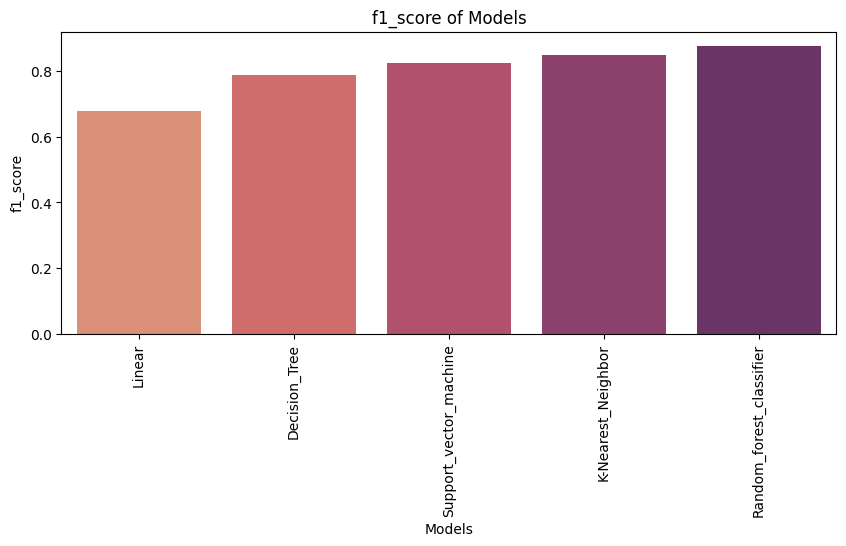

In [ ]:
# creating bar plot to visualize the f1_score of model 
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x='Models',y='f1_score',data=final_matrices.sort_values('f1_score'),palette="flare").set(title='f1_score of Models')
plt.xticks(rotation=90);

# **Conclusion**

* Education is important, as it is evident that if people are aware, they take



* care and precautions in order to avoid the risk of CHD.

* Both women and men lying in Age group of 50 and above have high risk of heart disease.

* Men above 45 years are usually at risk, where as women above 55 years are usually at risk.

* Men are more likely to have heart disease compared to women.
It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.

* Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.

* F1- score didn’t improved much after using hyperparameter tuning. Reason for this  are no specific co-relation between features.

* KNN and Random forest classifier models performed comparatively better than other models.
